# Keypoints description provided by OpenCV

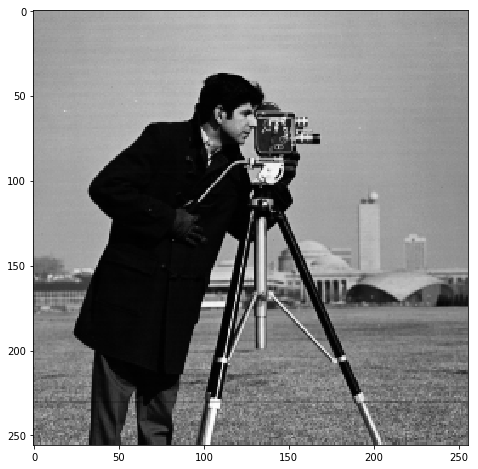

In [7]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

def unpack_octave(kpt_octave):
    '''Obtain octave, layer and scale from the octave attribute of an OpenCV keypoint'''
    _octave = kpt_octave
    octave = _octave&0xFF
    layer  = (_octave>>8)&0xFF
    if octave>=128:
        octave |= -128
    if octave>=0:
        scale = float(1/(1<<octave))
    else:
        scale = float(1<<-octave)
    return octave, layer, scale

def keypoint_info(kpt):
    '''Print OpenCV keypoint information'''
    
    octave, layer, scale = unpack_octave(kpt.octave)
    print('position: (%f, %f)\nangle: %f\nscale: %d\noctave: %d\nlayer: %d\nresponse: %f'%(
    kpt.pt[0],
    kpt.pt[1],
    kpt.angle,
    kpt.size,
    octave, 
    layer, 
    kpt.response
    ))

img = cv2.imread('cameraman.tiff', 0)

plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')


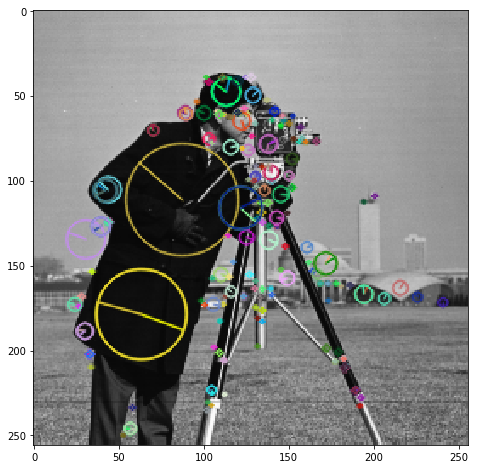

In [8]:
sift = cv2.xfeatures2d.SIFT_create(nfeatures=200, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)
kpts = sift.detect(img, None)

img_keypoints = np.zeros_like(img)
outImg = cv2.drawKeypoints(img, kpts, img_keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[8,8])
plt.imshow(outImg)


In [9]:
keypoint_info(kpts[0])

position: (157.864914, 74.660629)
angle: 276.939331
scale: 2
octave: -1
layer: 1
response: 0.067838


In [10]:
_, descriptors = sift.compute(img, kpts)
print(descriptors.shape)
print(descriptors[0])

(200, 128)
[ 37.  23.   4.   3.   6.   5.  43.  55.  66.  48.   3.   3.  18.  19.
  40.  53.   3.   1.  17.  26.  36.  26.  25.  12.   8.   7.  22.  41.
  31.  14.  13.   2.  25.  18.   4.   6. 120.  62.  45.  27. 130.  64.
   3.   4.  41.  40.  11.  48.  24.   3.  14.  14.  96. 130.  38.   9.
  16.   3.  10.  14.  39.  61.  53.   8.  16.   6.   1.   1. 130.  37.
   3.   4. 130.  80.   3.   2.  55.  14.   2.  21.  52.  17.   2.   9.
  69.  75.  31.   6.   4.   2.   1.   1.  10. 107.  62.   6.   4.   3.
   2.   4. 130.  14.   0.   0. 130. 130.  27.  11.  69.   4.   0.   0.
  40.  74.  77.  53.  19.   4.   0.   1.  17.  29.   8.   3.   2.  15.
   5.   2.]


## Apply an affine transform to the image

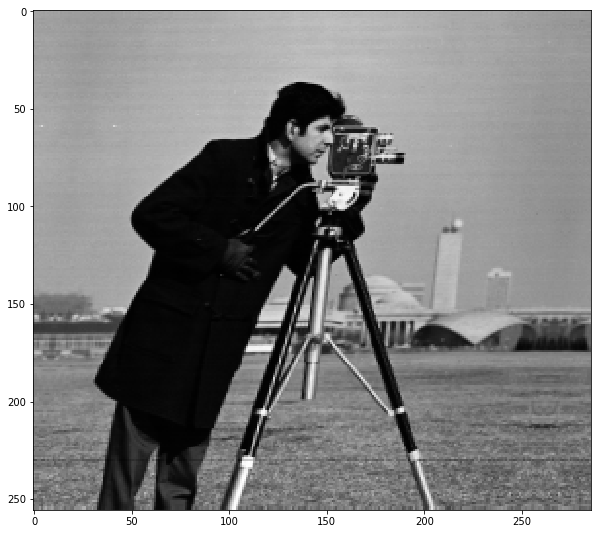

In [11]:
x_shear = 30
pts1 = np.array([(0, 0), (img.shape[1], 0), (img.shape[1], img.shape[0])], dtype=np.float32)
pts2 = np.array([(x_shear, 0), (img.shape[1]+x_shear, 0), (img.shape[1], img.shape[0])], dtype=np.float32)

M = cv2.getAffineTransform(pts1, pts2)

img_affine = cv2.warpAffine(img, M, (img.shape[1]+x_shear, img.shape[0]), borderMode=cv2.BORDER_REFLECT)

plt.figure(figsize=(10,10))
plt.imshow(img_affine, 'gray')

## Compare keypoints from the original and transformed image

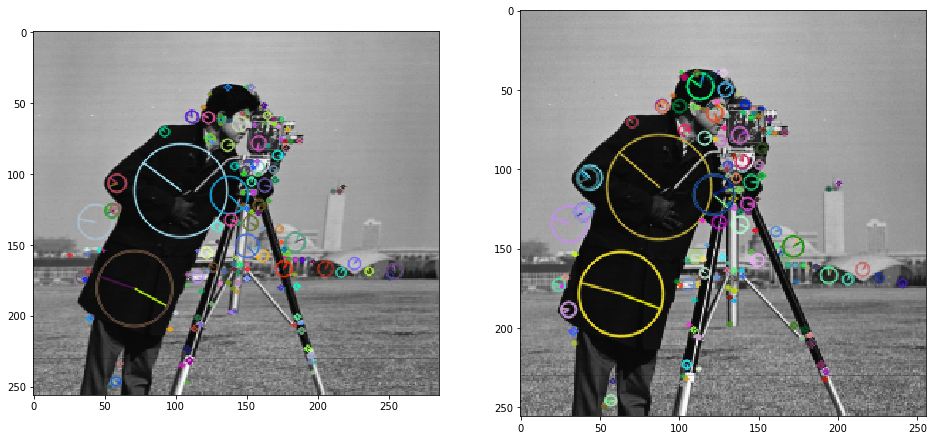

In [12]:
kpts = sift.detect(img_affine, None)

img_keypoints = np.zeros_like(img_affine)
kp_img_affine = cv2.drawKeypoints(img_affine, kpts, img_keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[16,8])
plt.subplot(1, 2, 1)
plt.imshow(kp_img_affine)
plt.subplot(1, 2, 2)
plt.imshow(outImg)
